## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.99

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 13s 259us/step - loss: 2.3080 - accuracy: 0.0999 - val_loss: 2.3086 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 15s 291us/step - loss: 2.3060 - accuracy: 0.1015 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 16s 324us/step - loss: 2.3076 - accuracy: 0.1000 - val_loss: 2.3064 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.387265). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.194587). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 18s 366us/step - loss: 0.9221 - accuracy: 0.6669 - val_loss: 1.6115 - val_accuracy: 0.5017
Epoch 33/50
50000/50000 [==============================] - 17s 343us/step - loss: 0.8927 - accuracy: 0.6782 - val_loss: 1.6096 - val_accuracy: 0.5084
Epoch 34/50
50000/50000 [==============================] - 20s 405us/step - loss: 0.8888 - accuracy: 0.6788 - val_loss: 1.6548 - val_accuracy: 0.4986
Epoch 35/50
50000/50000 [==============================] - 19s 385us/step - loss: 0.8794 - accuracy: 0.6810 - val_loss: 1.6562 - val_accuracy: 0.5074
Epoch 36/50
50000/50000 [==============================] - 16s 317us/step - loss: 0.8656 - accuracy: 0.6881 - val_loss: 1.7190 - val_accuracy: 0.4995
Epoch 37/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.8614 - accuracy: 0.6895 - val_loss: 1.7674 - val_accuracy: 0.4987
Epoch 38/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.8570 - accuracy: 0.6941 - va

50000/50000 [==============================] - 18s 370us/step - loss: 0.8756 - accuracy: 0.6874 - val_loss: 1.3883 - val_accuracy: 0.5369
Epoch 30/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.8390 - accuracy: 0.7014 - val_loss: 1.4189 - val_accuracy: 0.5370
Epoch 31/50
50000/50000 [==============================] - 15s 297us/step - loss: 0.8203 - accuracy: 0.7091 - val_loss: 1.4681 - val_accuracy: 0.5260
Epoch 32/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.8002 - accuracy: 0.7161 - val_loss: 1.4475 - val_accuracy: 0.5359
Epoch 33/50
50000/50000 [==============================] - 13s 252us/step - loss: 0.7744 - accuracy: 0.7223 - val_loss: 1.4803 - val_accuracy: 0.5327
Epoch 34/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.7568 - accuracy: 0.7294 - val_loss: 1.5030 - val_accuracy: 0.5310
Epoch 35/50
50000/50000 [==============================] - 15s 298us/step - loss: 0.7467 - accuracy: 0.7333 - va

50000/50000 [==============================] - 12s 250us/step - loss: 1.3708 - accuracy: 0.5213 - val_loss: 1.4295 - val_accuracy: 0.4947
Epoch 27/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3571 - accuracy: 0.5265 - val_loss: 1.4232 - val_accuracy: 0.4955
Epoch 28/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.3453 - accuracy: 0.5300 - val_loss: 1.4167 - val_accuracy: 0.4967
Epoch 29/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.3351 - accuracy: 0.5331 - val_loss: 1.4094 - val_accuracy: 0.5012
Epoch 30/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.3229 - accuracy: 0.5389 - val_loss: 1.4010 - val_accuracy: 0.5088
Epoch 31/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.3145 - accuracy: 0.5408 - val_loss: 1.3971 - val_accuracy: 0.5059
Epoch 32/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.3026 - accuracy: 0.5455 - va

50000/50000 [==============================] - 12s 243us/step - loss: 1.8259 - accuracy: 0.3648 - val_loss: 1.8272 - val_accuracy: 0.3633
Epoch 24/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.8190 - accuracy: 0.3674 - val_loss: 1.8210 - val_accuracy: 0.3635
Epoch 25/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.8128 - accuracy: 0.3684 - val_loss: 1.8150 - val_accuracy: 0.3699
Epoch 26/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.8068 - accuracy: 0.3715 - val_loss: 1.8087 - val_accuracy: 0.3730
Epoch 27/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.8008 - accuracy: 0.3736 - val_loss: 1.8035 - val_accuracy: 0.3735
Epoch 28/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.7950 - accuracy: 0.3764 - val_loss: 1.7976 - val_accuracy: 0.3768
Epoch 29/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7895 - accuracy: 0.3776 - va

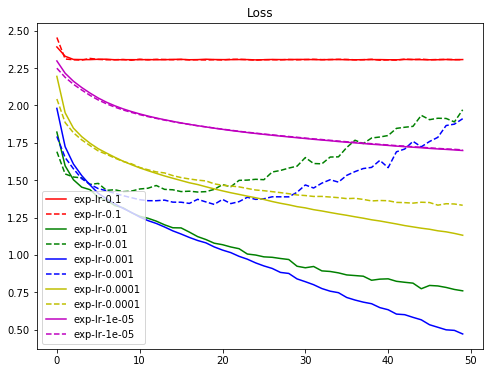

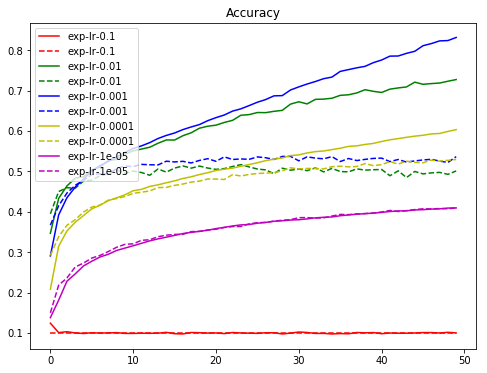

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()